In [1]:
'''
    Juan Tarrat - The University of Alabama in Huntsville
    CPE648 - Advanced Computer Networks
    Homework 1: CNN for CIFAR-10 Dataset
'''

from keras.datasets import cifar10
import matplotlib.pyplot as plt

(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

#get labels for each class
cifar10Labels = {
 0: "Plane",
 1: "Car",
 2: "Bird",
 3: "Cat",
 4: "Deer",
 5: "Dog",
 6: "Frog",
 7: "Horse",
 8: "Boat",
 9: "Truck"
}

In [4]:
def trainModel(model, epochs):
    return model.fit(xTrain, yTrainOneHot, epochs=epochs, verbose=1, validation_data=(xTest, yTestOneHot))

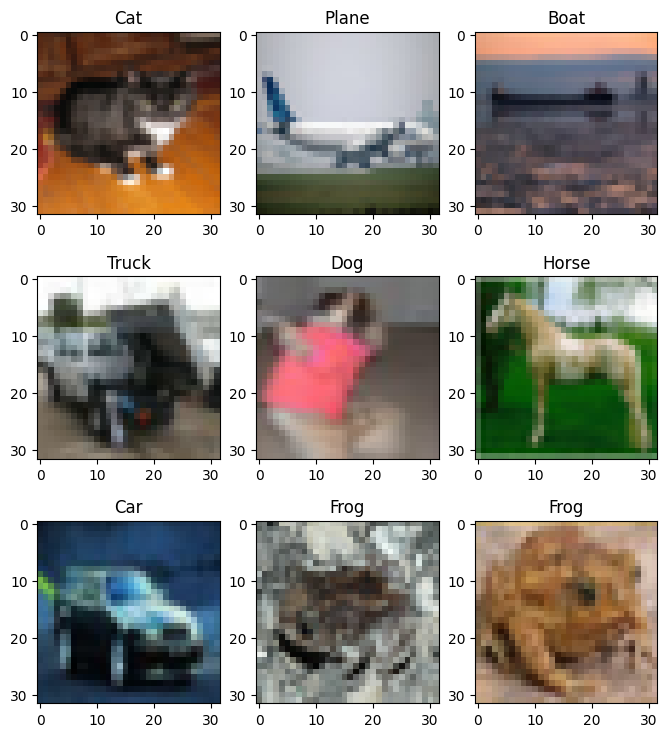

In [2]:
import random as rand

fig = plt.figure(figsize=(8,9))

rows = 3
cols = 3

#plot 9 random samples with their respective labels
for i in range(rows * cols):
    imNum = rand.randint(0, len(xTrain) - 1)
    im = xTrain[imNum]
    fig.add_subplot(rows, cols, i+1)

    imClass = yTrain[imNum][0]
    label = cifar10Labels[imClass]
    plt.imshow(im)
    plt.title(label)
    plt.show


In [6]:
#normalize data
xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')

xTrain /= 255
xTest /= 255

import keras.utils
#create one-hot encoding for labels
yTrainOneHot = keras.utils.to_categorical(yTrain,10)
yTestOneHot = keras.utils.to_categorical(yTest, 10)


In [2]:
def plotHistoryObject(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history

In [37]:
#create neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm

model1 = Sequential()
model1.add(Conv2D(64,(3,3), input_shape=(32,32,3), activation='relu', kernel_constraint=MaxNorm(3)))
model1.add(Conv2D(64,(3,3), activation='relu', kernel_constraint=MaxNorm(3)))
model1.add(MaxPooling2D(pool_size = (2,2), strides=2))
model1.add(Dropout(0.5))
model1.add(Conv2D(128,(3,3), activation='relu', kernel_constraint=MaxNorm(3)))
model1.add(MaxPooling2D(pool_size = (2,2), strides=2))
model1.add(Dropout(0.5))
model1.add(Conv2D(128,(3,3), activation='relu', kernel_constraint=MaxNorm(3)))
model1.add(Conv2D(128,(3,3), activation='relu', kernel_constraint=MaxNorm(3)))
model1.add(MaxPooling2D(pool_size = (2,2), strides=2))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax', kernel_constraint=MaxNorm(3)))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_87 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_84 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_88 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                               

Epoch 1/100
1563/1563 [==============================] - 189s 120ms/step - loss: 1.8818 - accuracy: 0.2701 - val_loss: 1.6993 - val_accuracy: 0.3816
Epoch 2/100
1563/1563 [==============================] - 174s 111ms/step - loss: 1.6011 - accuracy: 0.4060 - val_loss: 1.4772 - val_accuracy: 0.4670
Epoch 3/100
1563/1563 [==============================] - 172s 110ms/step - loss: 1.4825 - accuracy: 0.4643 - val_loss: 1.3642 - val_accuracy: 0.5141
Epoch 4/100
1563/1563 [==============================] - 178s 114ms/step - loss: 1.4072 - accuracy: 0.4969 - val_loss: 1.3877 - val_accuracy: 0.5179
Epoch 5/100
1563/1563 [==============================] - 181s 116ms/step - loss: 1.3501 - accuracy: 0.5188 - val_loss: 1.2667 - val_accuracy: 0.5434
Epoch 6/100
1563/1563 [==============================] - 178s 114ms/step - loss: 1.3127 - accuracy: 0.5374 - val_loss: 1.2082 - val_accuracy: 0.5872
Epoch 7/100
1563/1563 [==============================] - 207s 133ms/step - loss: 1.2829 - accuracy: 0.5499

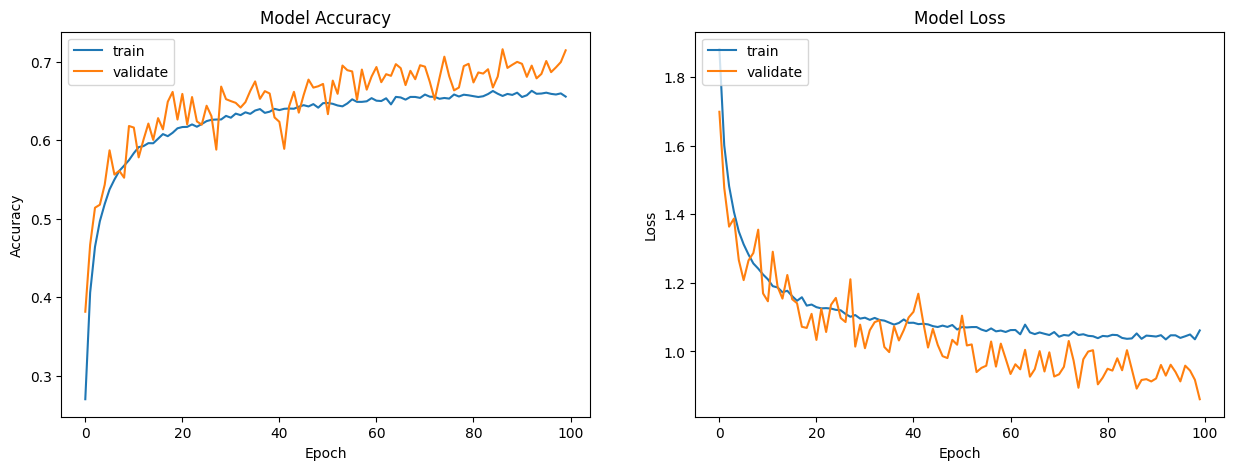

In [38]:
history1 = trainModel(model1, 100)
plotHistoryObject(history1)

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers import Adam
#create neural network
model2 = Sequential()
model2.add(Conv2D(64,(3,3), input_shape=(32,32,3), activation='relu', kernel_constraint=MaxNorm(3)))
model2.add(Conv2D(64,(3,3), activation='relu', kernel_constraint=MaxNorm(3)))
model2.add(MaxPooling2D(pool_size = (2,2), strides=2))
model2.add(Dropout(0.2))
model2.add(Conv2D(128,(3,3), activation='relu', kernel_constraint=MaxNorm(3)))
model2.add(MaxPooling2D(pool_size = (2,2), strides=2))
model2.add(Dropout(0.2))
model2.add(Conv2D(128,(3,3), activation='relu', kernel_constraint=MaxNorm(3)))
model2.add(Conv2D(128,(3,3), activation='relu', kernel_constraint=MaxNorm(3)))
model2.add(MaxPooling2D(pool_size = (2,2), strides=2))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax', kernel_constraint=MaxNorm(3)))

model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.002), metrics=['accuracy'])
model2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 30, 30, 64)        1792      
                                                                 
 conv2d_112 (Conv2D)         (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_109 (Dropout)       (None, 14, 14, 64)        0         
                                                                 
 conv2d_113 (Conv2D)         (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                               

Epoch 1/100
1563/1563 [==============================] - 186s 117ms/step - loss: 1.8157 - accuracy: 0.3071 - val_loss: 1.5071 - val_accuracy: 0.4450
Epoch 2/100
1563/1563 [==============================] - 176s 113ms/step - loss: 1.4993 - accuracy: 0.4572 - val_loss: 1.5081 - val_accuracy: 0.4803
Epoch 3/100
1563/1563 [==============================] - 173s 111ms/step - loss: 1.3628 - accuracy: 0.5123 - val_loss: 1.2387 - val_accuracy: 0.5564
Epoch 4/100
1563/1563 [==============================] - 192s 123ms/step - loss: 1.2902 - accuracy: 0.5451 - val_loss: 1.2628 - val_accuracy: 0.5532
Epoch 5/100
1563/1563 [==============================] - 183s 117ms/step - loss: 1.2423 - accuracy: 0.5648 - val_loss: 1.1456 - val_accuracy: 0.6142
Epoch 6/100
1563/1563 [==============================] - 178s 114ms/step - loss: 1.2044 - accuracy: 0.5807 - val_loss: 1.0932 - val_accuracy: 0.6263
Epoch 7/100
1563/1563 [==============================] - 174s 111ms/step - loss: 1.1662 - accuracy: 0.5946

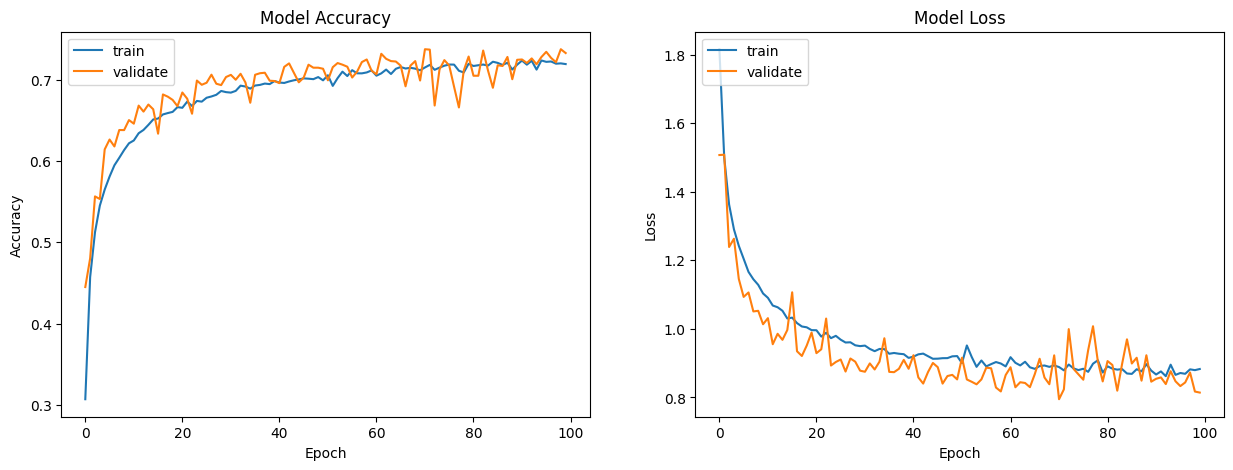

In [48]:
history2 = trainModel(model2, 100)
plotHistoryObject(history2)

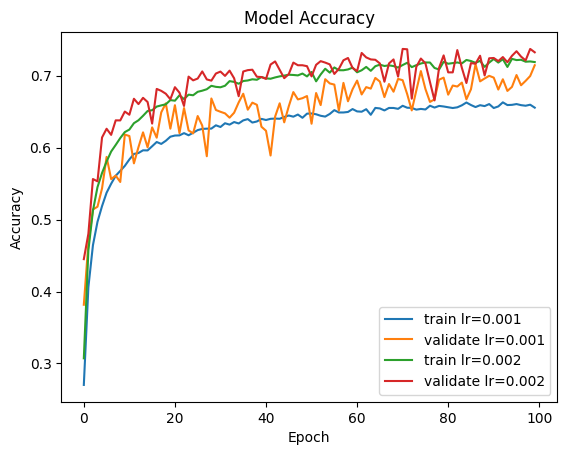

In [60]:
fig, axs = plt.subplots()
# summarize history for accuracy
axs.plot(history1.history['accuracy']) 
axs.plot(history1.history['val_accuracy']) 
axs.plot(history2.history['accuracy']) 
axs.plot(history2.history['val_accuracy']) 
axs.set_title('Model Accuracy')
axs.set_ylabel('Accuracy') 
axs.set_xlabel('Epoch')
axs.legend(['train lr=0.001', 'validate lr=0.001', 'train lr=0.002', 'validate lr=0.002'], loc='lower right')

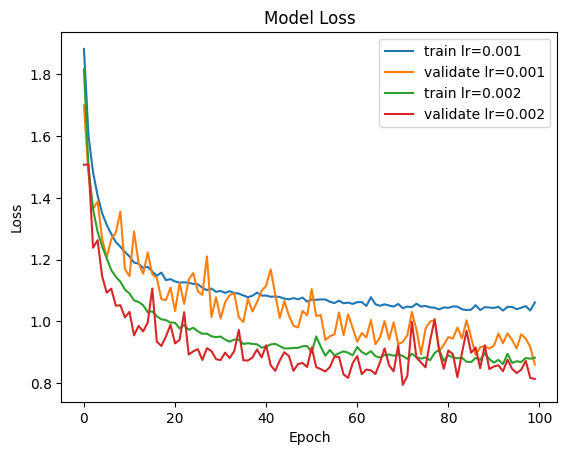

In [63]:
fig, axs = plt.subplots()
axs.plot(history1.history['loss']) 
axs.plot(history1.history['val_loss']) 
axs.plot(history2.history['loss']) 
axs.plot(history2.history['val_loss']) 
axs.set_title('Model Loss')
axs.set_ylabel('Loss') 
axs.set_xlabel('Epoch')
axs.legend(['train lr=0.001', 'validate lr=0.001', 'train lr=0.002', 'validate lr=0.002'], loc='upper right')